In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
import os
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load =  os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_whole_raw = pd.merge(df_clinical_trial_data, df_mouse_drug_data, on="Mouse ID")

# Display the data table for preview
df_whole_raw

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_tumor_mean = df_whole_raw.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_tumor_mean = pd.DataFrame(grouped_tumor_mean)
df_tumor_mean = df_tumor_mean.reset_index()

# Preview DataFrame
df_tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_tumor_sem = df_whole_raw.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_tumor_sem = pd.DataFrame(grouped_tumor_sem)
df_tumor_sem = df_tumor_sem.reset_index()

# Preview DataFrame
df_tumor_sem


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df_drug_timepoint_mean = df_tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df_drug_timepoint_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Simplify the data into the four target drug (Capomulin, Infubinol, Ketapril, and Placebo)
df_target_mean = df_drug_timepoint_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]

# convert the previouse DataFrame of Standard Error into same order for further calculation
df_drug_timepoint_sem = df_tumor_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
df_target_sem = df_drug_timepoint_sem[["Capomulin","Infubinol","Ketapril","Placebo"]]
df_drug_timepoint_sem 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


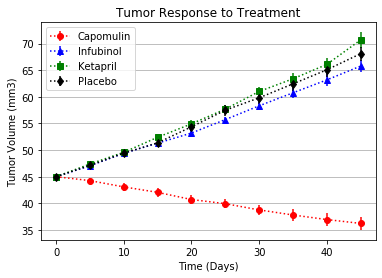

In [6]:
# prepare to draw the plot
fig1,ax1 = plt.subplots()

# prepare the settings of marker and color for each drug
import itertools
markers = itertools.cycle(('o', '^', 's', 'd')) 
colors = itertools.cycle(('red', 'blue', 'green', 'black'))

# Generate the Plot (with Error Bars)
for i in list(df_target_mean):
    ax1.errorbar(df_target_mean.index, df_target_mean[i], df_target_sem[i], 
             marker=next(markers), color=next(colors), linestyle=':', label=i)

# add legend, title and grid
ax1.legend(loc="upper left")
ax1.set(title="Tumor Response to Treatment", xlabel="Time (Days)", ylabel="Tumor Volume (mm3)")
ax1.grid(axis='y')

## A much quicker way to generate the plot, hard to set up unique marker for each drug though
# df_target_mean.plot(yerr=df_drug_timepoint_sem, 
#                     marker="o", 
#                     linestyle='--',
#                     color=['red','blue','green','black'],
#                     legend=True, ax=ax1)

# Save the Figure
fig1_save_path = os.path.join('Tumor Response to Treatment')
fig1.savefig(fig1_save_path)

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_mean = df_whole_raw.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
df_met_mean = pd.DataFrame(grouped_met_mean)
df_met_mean = df_met_mean.reset_index()

# Preview DataFrame
df_met_mean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_sem = df_whole_raw.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
df_met_sem = pd.DataFrame(grouped_met_sem)
df_met_sem = df_met_sem.reset_index()

# Preview DataFrame
df_met_sem

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_met_mean_pivot = df_met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_met_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Simplify the data into the four target drug (Capomulin, Infubinol, Ketapril, and Placebo)
df_met_mean_target = df_met_mean_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]

# convert the previouse DataFrame of Standard Error into same order for further calculation
df_met_sem_pivot = df_met_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
df_met_sem_target = df_met_sem_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
df_met_sem_target

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


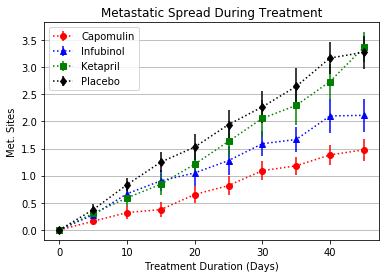

In [11]:
# prepare to draw the plot
fig2,ax2=plt.subplots()

# prepare the settings of marker and color for each drug
markers_met = itertools.cycle(('o', '^', 's', 'd')) 
colors_met = itertools.cycle(('red', 'blue', 'green', 'black'))

# Generate the Plot (with Error Bars)
for i in list(df_met_mean_target):
    ax2.errorbar(df_met_mean_target.index, df_met_mean_target[i], df_met_sem_target[i], 
             marker=next(markers_met), color=next(colors_met), linestyle=':', label=i)

# add legend, title and grid
ax2.legend(loc="upper left")
ax2.set(title="Metastatic Spread During Treatment", xlabel="Treatment Duration (Days)", ylabel="Met. Sites")
ax2.grid(axis='y')

# Save the Figure
fig2_save_path = os.path.join('Metastatic Spread During Treatment')
fig2.savefig(fig2_save_path)


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mousecount = df_whole_raw.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
df_mousecount = pd.DataFrame(grouped_mousecount)
df_mousecount = df_mousecount.reset_index()
df_mousecount = df_mousecount.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
df_mousecount

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [13]:
# Minor Data Munging to Re-Format the Data Frames
df_mousecount_pivot = df_mousecount.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
df_mousecount_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
# Simplify the data into the four target drug (Capomulin, Infubinol, Ketapril, and Placebo)
df_mousecount_target = df_mousecount_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
df_mousecount_target

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [15]:
# convert the mouse count into percentage change
# Since they all start from 25, we can simply times the data by 4 to get a percentage change
df_mousecount_pct = df_mousecount_target*4
df_mousecount_pct

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100,100,100,100
5,100,100,92,96
10,100,84,88,96
15,96,84,76,80
20,92,80,76,76
25,88,72,76,68
30,88,68,72,60
35,88,48,68,56
40,84,40,60,48


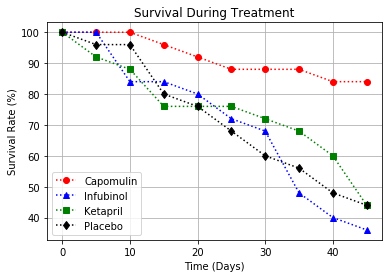

In [16]:
# prepare to draw the plot
fig3,ax3=plt.subplots()

# prepare the settings of marker and color for each drug
markers_met = itertools.cycle(('o', '^', 's', 'd')) 
colors_met = itertools.cycle(('red', 'blue', 'green', 'black'))

# Generate the Plot (with Error Bars)
for i in list(df_mousecount_pct):
    ax3.plot(df_mousecount_pct.index, df_mousecount_pct[i], 
             marker=next(markers_met), color=next(colors_met), linestyle=':', label=i)

# add legend, title and grid
ax3.legend(loc="lower left")
ax3.set(title="Survival During Treatment", xlabel="Time (Days)", ylabel="Survival Rate (%)")
ax3.grid()

# Show the Figure
fig3.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
df_tumor_pctchange = df_drug_timepoint_mean.pct_change(periods=9)
df_tumor_pctchange

# Display the data to confirm
df_tumor_pctchange.iloc[9]

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
Name: 45, dtype: float64

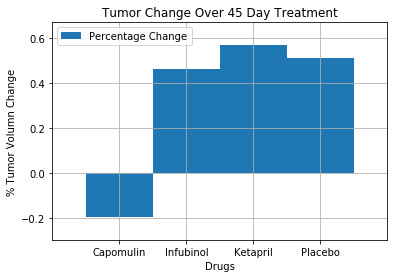

In [18]:
# Store all Relevant Percent Changes into a Tuple
# make a list to store the number of percentage change
pctchange_list = [df_tumor_pctchange.iloc[9][i] for i in df_tumor_pctchange]

# make a list to store the name of drugs
drug_list = list(df_tumor_pctchange)

# combine the two previous list into a dataframe
df_pctchange = pd.DataFrame({"Drug":drug_list,"Percentage Change":pctchange_list})

# focus on the target drugs we want
df_pctchange_target = df_pctchange[df_pctchange.Drug.isin(["Capomulin","Infubinol","Ketapril","Placebo"])]

# Splice the data between passing and failing drugs
df_pctchange_target.sort_values("Percentage Change")

# plot the bar chart
fig4,ax4 = plt.subplots()
df_pctchange_target.plot(kind='bar', width=1, ax=ax4)

# Orient widths. Add labels, tick marks, etc. 
# set xticks
ax4.set_xticks(np.arange(len(df_pctchange_target)))
ax4.set_xticklabels(df_pctchange_target["Drug"], rotation=0)
# set labels and title
ax4.set(xlabel="Drugs", ylabel="% Tumor Volumn Change", 
        title="Tumor Change Over 45 Day Treatment")
# add grid
ax4.grid()
# set xlim & ylim
ax4.set_xlim(-1, len(df_pctchange_target))
ax4.set_ylim(min(df_pctchange_target["Percentage Change"])-0.1, 
             max(df_pctchange_target["Percentage Change"])+0.1)


# Save the Figure
fig4_save_path = os.path.join('Tumor Change Over 45 Day Treatment')
fig4.savefig(fig4_save_path)

# Show the Figure
fig4.show()

![Metastatic Spread During Treatment](../Images/change.png)